# Taxi-week 3.
## Прогнозирование ряда со сложной сезонностью

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import datetime

In [2]:
import warnings
warnings.simplefilter(action='ignore')

## Загрузка данных
Загрузите все подготовленные данные о количестве поездок в Желтом такси и объедините в один датасет все, кроме данных за последний имеющийся месяц — июнь 2016.

In [4]:
df_6=pd.read_csv("data/aggs/taxi_2016_06.csv")
df_5=pd.read_csv("data/aggs/taxi_2016_05.csv")
df_3=pd.read_csv("data/aggs/taxi_2016_03.csv")
df_4=pd.read_csv("data/aggs/taxi_2016_04.csv")
df_2=pd.read_csv("data/aggs/taxi_2016_02.csv")
df_1=pd.read_csv("data/aggs/taxi_2016_01.csv")

In [5]:
df=pd.concat([ df_1,df_2,df_3,df_4,df_5], axis=0)

In [6]:
df.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,2016-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [353]:
df.shape

(3648, 2501)

###  👹Задание 1
- Выберите район, для которого вы хотите строить прогноз. Не забудьте, что нумерация районов идет с 1.
- Создайте датасет, в который поместите только информацию о времени (индексы строк) и числе поездок из выбранного района-единственный столбец
- Постройте график исходного ряда. Если видны какие-то аномалии, отметьте это.

Здесь и далее для работы с временными рядами можете пользоваться кодом из ноутбука с семинара 17. https://drive.google.com/file/d/1pOIUdenRSEje-iD1SVnFCItEdSIaeRui/view?usp=sharing


In [25]:
# Ваш кода  - создание датасета
pred_region = df[['Unnamed: 0', '1231']].rename(columns={'Unnamed: 0': 'time'}).set_index('time')
pred_region.head(5)

,1231
time,
2016-01-01 00:00:00,938.0
2016-01-01 01:00:00,830.0
2016-01-01 02:00:00,739.0
2016-01-01 03:00:00,771.0
2016-01-01 04:00:00,560.0


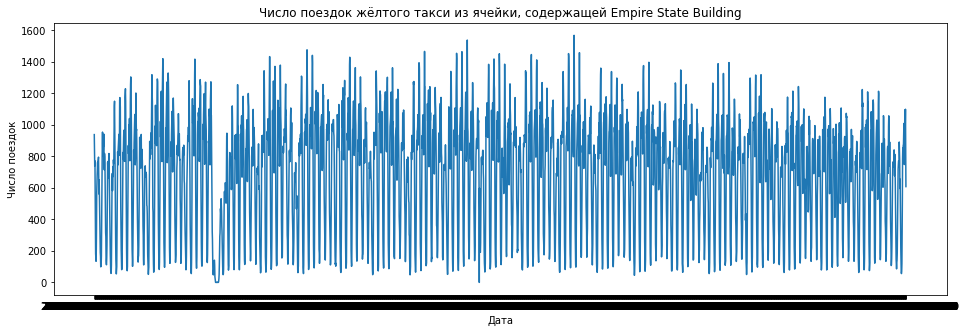

In [27]:
plt.figure(figsize=(16,5))
plt.plot(pred_region.index, pred_region['1231'], color='tab:blue')
plt.gca().set(title="Число поездок жёлтого такси из ячейки, содержащей Empire State Building", xlabel="Дата", ylabel="Число поездок")
plt.show()

###  👹Задание 2
Проверьте ряд на стационарность:
- Произведите декомпозицию ряда`sm.tsa.seasonal_decompose()`
- Используйте критерий Дики-Фуллера
- Напишите выводы о наличии/отсутствии стационарности

<Figure size 720x504 with 0 Axes>

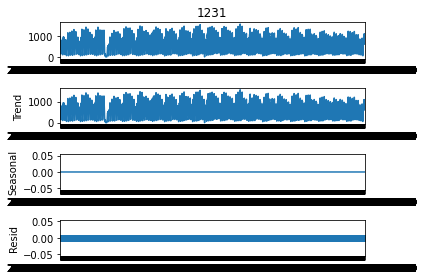

In [29]:
plt.figure(figsize=(10,7))
sm.tsa.seasonal_decompose(pred_region['1231'], period=1).plot()
plt.show()

## Конструирование признаков

###  👹Задание 3

Создайте регрессионные признаки для учёта сезонностей и трендов.
- Для учета недельной сезонности, добавьте в датасет признаки - компоненты ряда Фурье 
$$\sin{\frac{2\pi\cdot i\cdot t}{w}}, \quad  \cos{\frac{2\pi\cdot i\cdot t}{w}}, \; i=1..K$$

    Число $K$ выберите сами - начните с небольшого значения (2-5), $w$ - длительность периода в часах (например, длительность недели в часах=168)
- Годовую сезонность мы учесть не можем, т.к. данные у нас всего за 5 месяцев.
- Если ранее при декомпозиции вы увидели тренд - добавьте также признаки для его учета (это может быть $t$, $t^2$,...)
- Обучим регрессионную модель, включающую созданные признаки. Посмотрим, насколько хорошо этой моделью объясняется дисперсия.
- **Замечание:** обратите внимание на то, что в модель очень желательно включить константу - иначе прогноз может оказаться смещенным. 

In [ ]:
# Ваш код

###  👹Задание 4
1. Составьте временные ряды:
- из остатков регрессионной модели
- из продифференцированных остатков модели (обычное и/или сезонное дифференцирование)
2. Произведите декомпозиции этих рядов, примените критерий Дики-Фуллера и проверьте получившиеся ряды на стационарность

In [ ]:
# Ваш код

##  Подбор параметров моделей SARMA и SARIMA

**Всюду далее будем работать только рядом из остатков (т.е будем конструировать модель SARMA).**

**Если вы решите работать c продифференцированными остатками (и конструировать модель SARIMA), то эту работу проведите дома самостоятельно.**

###  👹Задание 5
С помощью  `statsmodels.api.graphics.tsa.plot_acf` и `statsmodels.api.graphics.tsa.plot_pacf` по автокорреляции и частичной автокорреляции подберите параметры модели ARMA - p,q,P,Q. 

**Замечание:** имейте в виду, что при выборе больших значений параметров модель будет весьма долго обучаться. 

##  Обучение моделей и проверка качества прогноза  

Определим функцию, которая будет строить модели SARIMA с помощью функции SARIMAX для разных значений параметров p,q,P,Q (по сетке) и выбирать наилучшую по метрике aic. Источник https://gist.github.com/JessicaFB/af4c9d12ec8314cff56b5e0f18b8e61c

In [391]:
def sarimax_gridsearch(ts, exog, par, d=0, D=0, s=24, maxiter=50, freq='H'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by AIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best AIC value
    ans = []
    for comb in par:
        try:
            #print("ahahah")
            model = sm.tsa.statespace.SARIMAX(timeseries, exog,
                                                order=(comb[0],d,comb[1]),
                                                seasonal_order=(comb[2],D, comb[3],s),
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                freq=freq)
            #print("ohoho")
            output = model.fit(maxiter=maxiter, method='nm', disp=-1)#, low_memory=True) 
            #print("sg")
            ans.append([comb,output.aic])
            print('SARIMAX {} x {}12 : AIC Calculated ={}'.format(comb, output.aic))
        except:
            continue
            
    # Find the parameters with minimal AIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pqPQ', 'aic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['aic'],ascending=True)[0:10]
    
    return ans_df

В качестве максимальных значений для p, q, P, Q вставьть те, которые подобрали ранее по графикам автокорреляции и частичной автокорреляции
В качестве параметров `exog` вам необходимо брать все те регрессионные признаки, которые вы добавили в модель.

In [393]:
# 
Q = range(0, ...)
q = range(0, ...)
P = range(0, ...)
p = range(0, ...)
D=0
d=0
s=24
ex=....

In [5]:
from itertools import product
parameters = list(product(p, q, P, Q))
len(parameters)

**Совет:** если длина списка параметров у вас получится большая, то для начала передайте в функцию  `sarimax_gridsearch` только начало списка (например, первые 4 элемента) и оцените, насколько быстро у вас отрабатывает функция. Если дольше 2 минут, то оставьте перебор по всему списку параметров на дом.

In [8]:
%%time
sarimax_gridsearch(...my_timeseries...,ex, parameters[...], freq='H')

Wall time: 0 ns


###  👹Задание 6
- Выберите оптимальную по AIC модель, обучите ее.
- На одном графике изобразите исходный ряд за 5 месяцев и прогнозные значения, получаемые с помощью модели.
- Проведите численную оценку качества с помощью одной из регрессионных метрик (MSE, MAE, MAPE...). 
    При этом имейте в виду, что не стоит опираться на несколько первых значений остатков модели, они считаются "ненадежными"  и обычно исключаются при оценке качества.
    Номер первого "надежного" остатка вычисляется по формуле:

$$\max{\{(P+D)s+p+d, Qs+q}\}$$

In [408]:
p=...
P=...
Q=...
q=...
D=0
d=0
s=24
ex=...
mod = sm.tsa.statespace.SARIMAX(...my_timeseries...,exog=ex, order=(p, d, q),
                                       seasonal_order=(P, D, Q, s),
                                       enforce_stationarity=False,
                                       enforce_invertibility=False,freq='H').fit(disp=False)

In [7]:
print(mod.summary())

In [ ]:
# Ваш код - построение графиков

In [107]:
# импортируете функций вычисления регрессионных метрик
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score  

In [9]:
# Ваш код - вычисление метрик

## Прогнозирование на новых данных

###  👹Задание 7
- Создайте расширенный датасет,объединив данные за все 6 месяцев. Вычислите и занесите в этот датасет значения всех выделенных в Задании 3 признаков.
- Получите прогноз на январь-июнь 2016, также можно (при желании) вычислить доверительные интервалы для прогнозных значений.
- Отобразите на графике истинные значения ряда за январь-июнь, прогнозные значения и, при желании доверительные интервалы для прогнозных значений. Для отрисовки доверительных интервалов пригодится код:

    `plt.fill_between(my_timeseries, ci.iloc[:,0].values, ci.iloc[:,1].values, color='r', alpha=0.1)`
- Вычислите значения регрессионных метрик качества из Задания 6 на данных за июнь


In [10]:
# Ваш код - создание датасета

In [432]:
predict=mod.get_prediction(start=datetime.datetime.strptime("2016-01-01 00:00:00", "%Y-%m-%d %H:%M:%S"), 
                                         end=datetime.datetime.strptime("2016-06-30 23:00:00", "%Y-%m-%d %H:%M:%S"), 
                                         dynamic=False,  exog=...
predict_conf_int = predict.conf_int() # доверительные интервалы для прогнозов
ci=predict_conf_int.loc['2016-01-01':,]

In [ ]:
# Ваш код - построение графика

In [ ]:
# Ваш код - вычисление метрик качества

## Выводы
###  👹Задание 8 и самое интересное
- Сделайте вывод о качестве прогноза модели, в т.ч. на новых данных
- Определите в какие даты прогноз модели сильно расходится с истинными значениями. С чем это может быть связано?
- Попробуйте добавить в модель регрессионные признаки: еще несколько компонент Фурье, индикаторы праздничных дней, индикаторы природных аномалий и др.
- Обучите модель заново и проведите аналогичный сделанному выше анализ. Улучшилось ли качество прогноза?

**Немного полезных ссылок:**
- Как добавить элементы ряда Фурье в качестве предикторов https://otexts.com/fpp2/useful-predictors.html
- SARIMAX  in Python  https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html
- Holidays in Python 
https://towardsdatascience.com/5-minute-guide-to-detecting-holidays-in-python-c270f8479387
- Wheather events in New York
https://www.weather.gov/okx/stormevents
- Про то, на какие остатки модели не стоит обращать внимание https://www.statsmodels.org/devel/examples/notebooks/generated/statespace_sarimax_faq.html
